In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")
urls_data.head()
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens
# Labels
y = urls_data["label"]
# Features
url_list = urls_data["url"]
# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)	
# Model Building
#using logistic regression
logit = LogisticRegression()
logit.fit(X_train, y_train)
# Accuracy of Our Model
print("Accuracy ",logit.score(X_test, y_test))
X_predict = ["google.com/search=jcharistech",
            " www.silkroadmeds-onlinepharmacy.com",
"pakistanifacebookforever.com/getpassword.php/", 
"www.radsport-voggel.de/wp-admin/includes/log.exe", 
"ahrenhei.without-transfer.ru/nethost.exe ",
"www.itidea.it/centroesteticosothys/img/_notes/gum.exe",]
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)
print(New_predict)
y_pred = logit.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
# https://db.aa419.org/fakebankslist.php
X_predict1 = [ "google.com/search=jcharistech",
"www.unitedairlineslogistics.com",
"www.stonehousedelivery.com" ]
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = logit.predict(X_predict1)
print(New_predict1)
# Using Default Tokenizer
vectorizer = TfidfVectorizer()
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)	
# Model Building

logit = LogisticRegression()	#using logistic regression
logit.fit(X_train, y_train)
# Accuracy of Our Model with our Custom Token
print("Accuracy ",logit.score(X_test, y_test))



Accuracy  0.9613404207246738
['good' 'bad' 'good' 'bad' 'bad' 'bad']
Misclassified samples: 3251
['good' 'bad' 'bad']
Accuracy  0.9628506534432116


<Figure size 640x480 with 1 Axes>

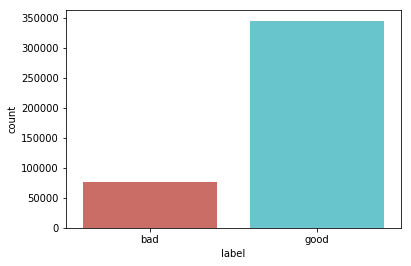

In [2]:
import seaborn as sns
urls_data['label'].value_counts()
sns.countplot(x='label',data=urls_data,palette='hls')
plt.show()

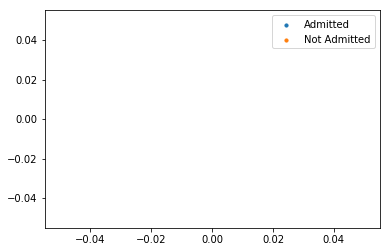

In [10]:
import matplotlib.pyplot as plt
X_test = urls_data.iloc[:, :-1]# X = feature values, all the columns except the last column
y_test = urls_data.iloc[:, -1] # y = target values, last column of the data frame
admitted = urls_data.loc[y_test == 0] # filter out the applicants that got admitted
not_admitted = urls_data.loc[y_test == 1] # filter out the applicants that din't get admission
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

#### Split into training and testing dataset 80/20 ratio

### Predicting With Our Model